In [265]:
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import (
    PolynomialFeatures,
    OneHotEncoder
)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# time-related stack
from datetime import datetime as dt


In [ ]:
def plot_series(X, Y, format, start = 0, end = None, title = None, xlabel = None, ylabel = None, legend = None, size = (16,9)):

    plt.figure(figsize = size)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [208]:
data = pd.read_csv("../../data/daily_sunspots_time_series_1850-01_2024-05.csv", parse_dates=['date'])

## EDA

In [209]:
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63673 entries, 0 to 63672
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       63673 non-null  datetime64[ns]
 1   year       63673 non-null  int64         
 2   month      63673 non-null  int64         
 3   day        63673 non-null  int64         
 4   date_frac  63673 non-null  float64       
 5   counts     63673 non-null  int64         
 6   std        63673 non-null  float64       
 7   nobs       63673 non-null  int64         
 8   indicator  121 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 4.4+ MB


,count,mean,min,25%,50%,75%,max,std
date,63673,1937-03-02 00:00:00,1850-01-01 00:00:00,1893-08-01 00:00:00,1937-03-02 00:00:00,1980-09-30 00:00:00,2024-04-30 00:00:00,NaN
year,63673.0,1936.666515,1850.0,1893.0,1937.0,1980.0,2024.0,50.325569
month,63673.0,6.515383,1.0,4.0,7.0,10.0,12.0,3.45023
day,63673.0,15.729147,1.0,8.0,16.0,23.0,31.0,8.79993
date_frac,63673.0,1937.165879,1850.001,1893.582,1937.166,1980.747,2024.329,50.325293
counts,63673.0,83.410174,0.0,21.0,64.0,128.0,528.0,76.875804
std,63673.0,7.084788,0.0,3.4,6.6,9.9,77.7,4.494376
nobs,63673.0,6.00212,1.0,1.0,1.0,1.0,69.0,10.018833


In [232]:
data2 = data.drop('indicator', axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

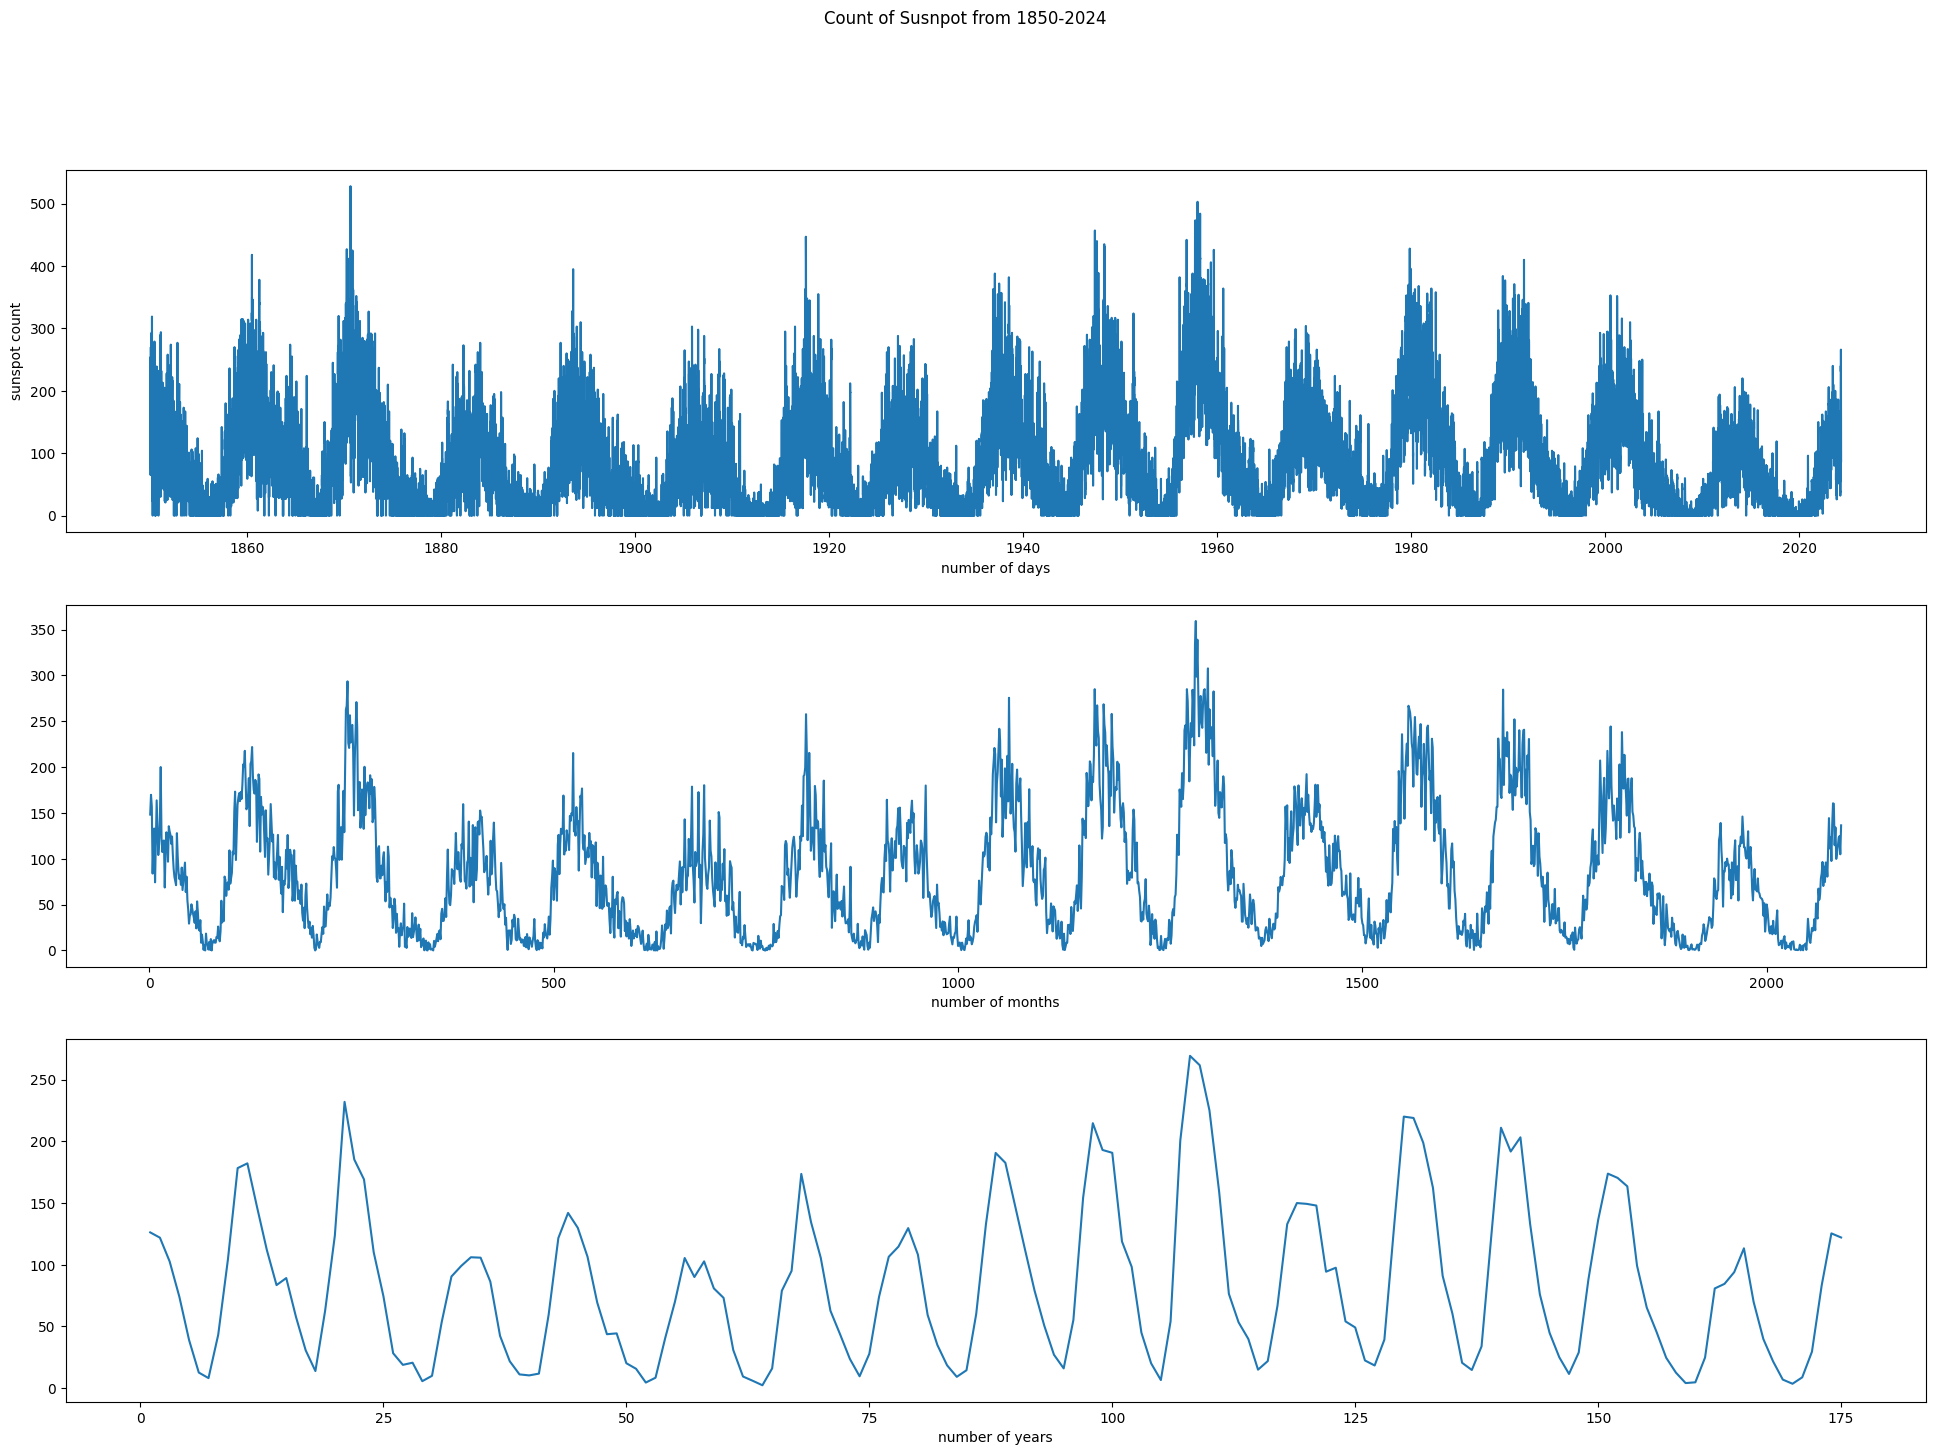

In [243]:
daily = data2.resample('D', on = 'date').mean()
monthly = data2.resample('M', on = 'date').mean()
yearly = data2.resample('Y', on = 'date').mean()

n_months = np.linspace(1, monthly.shape[0], monthly.shape[0])
n_years = np.linspace(1, yearly.shape[0], yearly.shape[0])

fig, axs = plt.subplots(3,1, figsize = (24,16))
fig.suptitle('Count of Susnpot from 1850-2024')
axs[0].plot(data2.date, data2.counts)
axs[0].set_xlabel('number of days')
axs[0].set_ylabel('sunspot count')
axs[1].plot(n_months, monthly.counts)
axs[1].set_xlabel('number of months')
axs[2].plot(n_years, yearly.counts)
axs[2].set_xlabel('number of years')
plt.show



## Autocorrelation-based seasonality test

In [260]:
data3 = data2.copy()
data3['timestep'] = list(range(data3.shape[0]))
X_trend = data3[['timestep']]
Y_trend = data3.counts

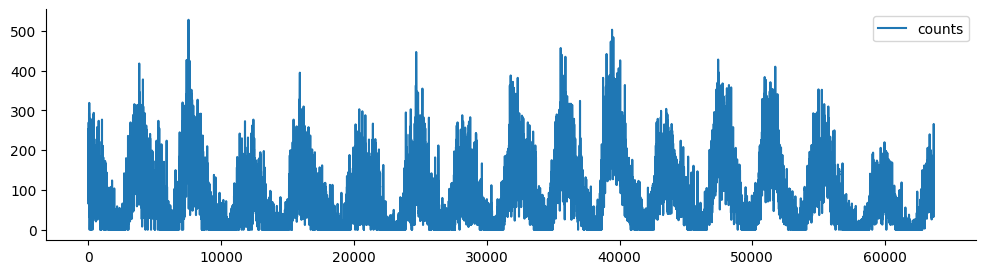

In [266]:
trend_model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
trend_model.fit(X_trend, Y_trend)
data3['trend'] = trend_model.predict() 
mpl.rc('figure',figsize=(12,3),dpi=100)

data3.counts.plot(legend=True)
sns.despine()